### Imports

In [1]:
import sys
sys.path.insert(0, 'D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\Classes')

import warnings
warnings.filterwarnings('ignore')

from models import ClassificationModel, EmbeddingsModel, SiameseModel
from trainer import SiameseTrainerCombinationDataset, all_subjects

import torch
import json


### Set Hyperparameters

In [15]:
trainer_hyperparameter = {
    "path": "D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\FeatureGeneration\dataset_processed\XITE\\normalized_subjects_no_outliner.pkl",
    "subjects_train": all_subjects,
    "wandb": False,
    "log": True,
    "learning_rate": 0.001,
    "batch_size": 256,
    "dataset_ignore_subject_train": True,
    "decision_function": 0,
    "filter": [-1, -2, -3],
    "weight_decay": 0,
    "lr_steps": 10,
    "adam": True,
    "number_steps": 200
}

model_embedding_hyperparameter = {
        "sigmoid": False,
        "dropout": 0.6,
        "layers": [207, 128, 64]
}

model_classifier_hyperparameter = {
    "dropout": 0.6,
    "layers": [64, 32]
}

### Init models

In [16]:
classifier_model = ClassificationModel(model_classifier_hyperparameter)
embedding_model = EmbeddingsModel(model_embedding_hyperparameter)

siamese_model = SiameseModel(embedding_model, classifier_model, decision_function=trainer_hyperparameter["decision_function"])

# #
#  0 = abs(sub())
#  1 = euclid
#  2 = cos_simil
# #

In [18]:
filter = lambda data: data["label"].isin(trainer_hyperparameter["filter"])
trainer = SiameseTrainerCombinationDataset(trainer_hyperparameter, siamese_model, device="cuda:0", filter=filter)

### start training

In [19]:
trainer.trainloop(20)

epoch: 1 | train_acc: 0.5582 | test_acc: 0.7081
epoch: 2 | train_acc: 0.6853 | test_acc: 0.756
epoch: 3 | train_acc: 0.7075 | test_acc: 0.7639
epoch: 4 | train_acc: 0.7134 | test_acc: 0.7632
epoch: 5 | train_acc: 0.717 | test_acc: 0.7654
epoch: 6 | train_acc: 0.7214 | test_acc: 0.7695
epoch: 7 | train_acc: 0.7229 | test_acc: 0.7715
epoch: 8 | train_acc: 0.7283 | test_acc: 0.7723
epoch: 9 | train_acc: 0.7289 | test_acc: 0.7681
epoch: 10 | train_acc: 0.7364 | test_acc: 0.773
epoch: 11 | train_acc: 0.7351 | test_acc: 0.7718
epoch: 12 | train_acc: 0.738 | test_acc: 0.7706
epoch: 13 | train_acc: 0.7377 | test_acc: 0.7709
epoch: 14 | train_acc: 0.7465 | test_acc: 0.7737
epoch: 15 | train_acc: 0.7415 | test_acc: 0.7723
epoch: 16 | train_acc: 0.7479 | test_acc: 0.774
epoch: 17 | train_acc: 0.7437 | test_acc: 0.7733
epoch: 18 | train_acc: 0.7452 | test_acc: 0.7761
epoch: 19 | train_acc: 0.7488 | test_acc: 0.778
epoch: 20 | train_acc: 0.7494 | test_acc: 0.7778


In [20]:
#trainer.plot_history()

### plot additional result data

In [21]:
best_epoch = max(trainer.history, key=lambda x:x['test_acc'])["epoch"]
cm = trainer.history_cm[best_epoch-1]["cm"]

print("acc:", trainer.history[best_epoch-1]["test_acc"])

acc: 0.778


In [22]:
trainer.calculate_f_scores(cm)

{'recall': 0.7584544513087883,
 'precision': 0.8200702729835129,
 'f1': 0.7880598122518646}

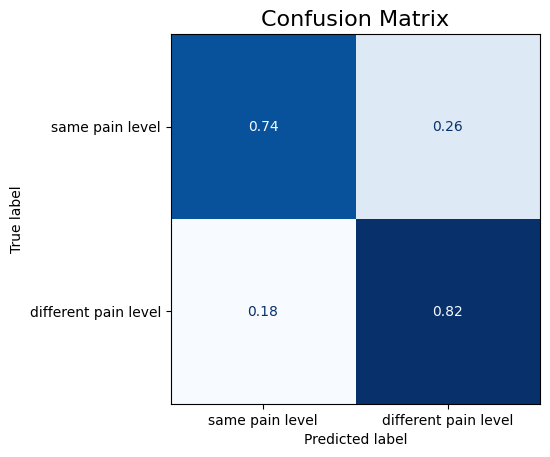

In [23]:
trainer.plot_cm(cm)